In [ ]:
import torch
import argparse
import numpy as np
import torchvision
import torchvision.models as models
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow

In [1]:
from google.colab import drive
import os


drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/수업/20211224(CNN)/')

Mounted at /content/drive


# DataLoader

## Preset DataLoader in Pytorch API

### MNIST Data

- 60000 train set
- 10000 validation set
- 10 classes

In [ ]:
train_mnist = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_mnist = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_mnist, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_mnist, batch_size=32, shuffle=False)

In [ ]:
print('number of train data : %d, number of test data : %d'%(len(train_mnist), len(test_mnist))) 

number of train data : 60000, number of test data : 10000


In [ ]:
print('number of train batch : %d, number of test batch : %d'%(len(train_loader), len(test_loader)))

number of train batch : 1875, number of test batch : 313


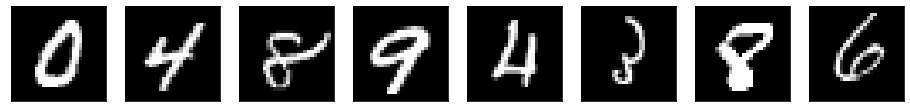

In [ ]:
def show_mnist():
    for images, _ in train_loader:
        images_to_show = images.squeeze().numpy()
        fig = plt.figure(figsize=(16, 2))
        for i in range(8):
            fig.add_subplot(1, 8, i+1)
            plt.imshow(images_to_show[i], cmap='gray')
            plt.xticks([])
            plt.yticks([])
        fig.show()
        break


show_mnist()

### CIFAR-10 Data

- 50000 train set
- 10000 validation set
- 10 classes

In [ ]:
train_cifar = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_cifar = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_cifar, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_cifar, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print('number of train data : %d, number of test data : %d'%(len(train_cifar), len(test_cifar))) 

number of train data : 50000, number of test data : 10000


In [ ]:
print('number of train batch : %d, number of test batch : %d'%(len(train_loader), len(test_loader)))

number of train batch : 1563, number of test batch : 313


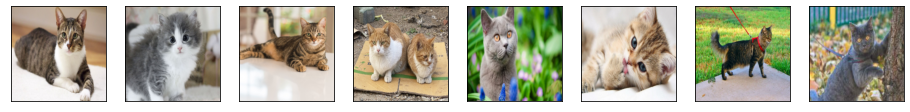

In [ ]:
def show_image(loader, fig_num=8):
    for images, _ in loader:
        images_to_show = images.numpy().transpose((0, 2, 3, 1))
        fig = plt.figure(figsize=(16, 5))
        for i in range(fig_num):
            fig.add_subplot(1, fig_num, i+1)
            plt.imshow(images_to_show[i])
            plt.xticks([])
            plt.yticks([])
        fig.show()
        break


show_image(train_loader)

## Preset DataLoader use with Pytorch ImageFolder

### Image Data Augmentation

In [ ]:
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=torchvision.transforms.ToTensor())                        
test_d = torchvision.datasets.ImageFolder('./data/minidata/val',transform=torchvision.transforms.ToTensor())

In [ ]:
print('number of train data : %d, number of test data : %d'%(len(train_d), len(test_d))) 

number of train data : 20, number of test data : 6


In [ ]:
# size of images are different so must be transforming before make dataloader
train_d[0][0].size(), train_d[1][0].size()

(torch.Size([3, 448, 680]), torch.Size([3, 458, 600]))

In [ ]:
transform = torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((224, 224)),
                                            torchvision.transforms.ToTensor(),
                                            ])

train_d = torchvision.datasets.ImageFolder('./data/minidata/train', transform=transform)
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

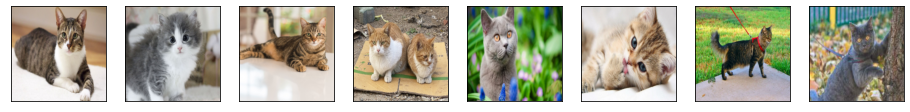

In [ ]:
show_image(train_loader)

In [ ]:
# we can crop to data augmentation
transform = torchvision.transforms.Compose([
                                            torchvision.transforms.RandomResizedCrop((224, 224)),
                                            torchvision.transforms.ToTensor(),
                                            ])

train_d = torchvision.datasets.ImageFolder('./data/minidata/train', transform=transform)
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

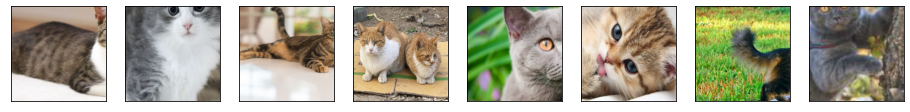

In [ ]:
show_image(train_loader)

In [ ]:
# we can also filp or rotation
transform = torchvision.transforms.Compose([
                                            torchvision.transforms.RandomResizedCrop((224, 224)),
                                            torchvision.transforms.RandomRotation((-180, 180)),
                                            torchvision.transforms.RandomHorizontalFlip(),
                                            torchvision.transforms.RandomVerticalFlip(),
                                            torchvision.transforms.ToTensor(),
                                            ])

train_d = torchvision.datasets.ImageFolder('./data/minidata/train', transform=transform)
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

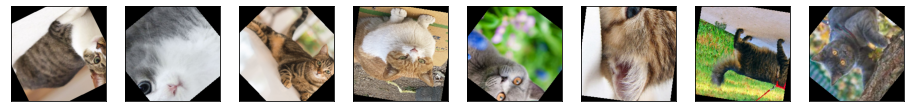

In [ ]:
show_image(train_loader)

### Normalization

In [ ]:
transform=torchvision.transforms.Compose([
                              torchvision.transforms.RandomResizedCrop((224, 224)),
                              torchvision.transforms.ToTensor(),                   
                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

In [ ]:
# calculate std & mean
for img, _ in train_loader:
    mean = torch.stack([img[:, 0].mean(), img[:, 1].mean(), img[:, 2].mean()])
    standard = torch.stack([img[:, 0].std(), img[:, 1].std(), img[:, 2].std()])

print(mean.tolist())
print(standard.tolist())

[0.6005388498306274, 0.5458582639694214, 0.4728037118911743]
[0.27498412132263184, 0.2678011953830719, 0.28599196672439575]


In [ ]:
transform = torchvision.transforms.Compose([
                                            torchvision.transforms.RandomResizedCrop((224, 224)),
                                            torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize(mean=mean.tolist(), std=standard.tolist()),
                                            ])

train_d = torchvision.datasets.ImageFolder('./data/minidata/train', transform=transform)
test_d = torchvision.datasets.ImageFolder('./data/minidata/val', transform=transform)

train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)
test_loader= torch.utils.data.DataLoader(test_d, batch_size=10, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


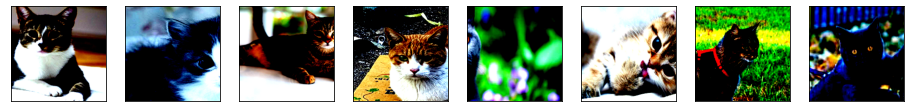

In [ ]:
show_image(train_loader)

## Make Custom Dataloader

In [ ]:
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from PIL import Image
from glob import glob

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, train_dir='./data/minidata/train', image_size=64):
        self.train_dir = train_dir
        self.train_data = glob(os.path.join(self.train_dir, '*', '*'))
        self.transform = transforms.Compose([
                                             transforms.Resize((image_size, image_size)),
                                             transforms.ToTensor(),
                                             ])
    
    def __len__(self):
        return len(self.train_data)
    
    def __getitem__(self, index):
        image = Image.open(self.train_data[index]).convert('RGB')
        image = self.transform(image)
        image_name = self.train_data[index].split('/')[-1]
        if self.train_data[index].split('/')[-2] == 'cat':
            label = 0
        elif self.train_data[index].split('/')[-2] == 'dog':
            label = 1
        
        return image, label, image_name

In [ ]:
def show_labeled_image(loader, fig_num=8):
    for images, _, _ in loader:
        images_to_show = images.numpy().transpose((0,2,3,1))
        fig=plt.figure(figsize=(16, 5))
        for i in range(fig_num):
            fig.add_subplot(1, fig_num, i+1)
            plt.imshow(images_to_show[i])
            plt.xticks([])
            plt.yticks([])    
        fig.show()
        break

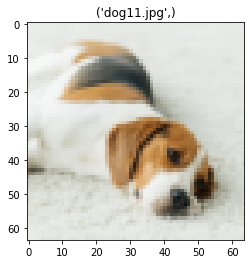

Class: 1


In [ ]:
mydataset = CustomImageDataset()

image, label, name = next(iter(torch.utils.data.DataLoader(mydataset, batch_size=1, shuffle=False)))
im = plt.imshow(image[0].permute(1,2,0))
plt.title(name)
plt.show()
plt.close()
print('Class:', label.item())

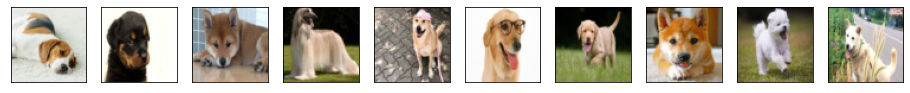

In [ ]:
train_loader = torch.utils.data.DataLoader(mydataset, batch_size=10, shuffle=False)
show_labeled_image(train_loader, fig_num=10)

In [ ]:
for batch, (image, label, name) in enumerate(train_loader):
    print(batch, name)
    break

0 ('dog11.jpg', 'unnamed.jpg', 'qx2w21ds114o5i19bv7g.jpg', '808641_838604_148.jpg', 'imagesrre.jpg', 'ererrere.jpg', '20191120501989.jpg', 'ttaatta.jpg', '2-38.jpg', '193887_98886_128.png')


# Neural Network

In [10]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.datasets as vision_dsets
import torchvision.transforms as T
import torch.optim as optim
from torch.utils import data
import os


os.environ['CUDA_VISIBLE_DEVICES'] = '0'

## Load Data Loader

In [11]:
def mnist_data(root='./data', batch_size=32, num_worker=1):
    print("[+] Get the MNIST DATA")

    mnist_train = vision_dsets.MNIST(root = root, train=True, transform=T.ToTensor(), download=True)
    mnist_test = vision_dsets.MNIST(root = root, train=False, transform=T.ToTensor(), download=True)

    train_loader = data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, num_workers=1)
    test_loader = data.DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=False, num_workers=1)

    print ("[+] Finished loading data & Preprocessing")
    return mnist_train, mnist_test, train_loader, test_loader

In [12]:
train_data, test_data, train_loader, test_loader = mnist_data(batch_size=32)

[+] Get the MNIST DATA
[+] Finished loading data & Preprocessing


## Define Trainer

In [29]:
class Trainer():
    def __init__(self, trainloader, testloader, model, optimizer, criterion):
        self.trainloader = trainloader
        self.testloader = testloader
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion
    

    def train(self, epochs = 1):
        self.model.train()
        for epoch in range(epochs):
            running_loss = 0.0
            for i, data in enumerate(self.trainloader):
                # get input
                inputs, labels = data
                inputs = inputs.cuda()
                labels = labels.cuda()
                self.optimizer.zero_grad()

                # forward
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                # backward
                loss.backward()

                # optimize
                self.optimizer.step()

                running_loss += loss.item()
                if (i+1) % 500 == 0:
                    print('[%d. %5d] loss: %.3f'%(epoch+1, i+1, running_loss / 500))
                    running_loss =0.0

        print('Finished Training')

    
    def test(self):
        self.model.eval()

        test_loss = 0
        correct = 0

        for inputs, labels in self.testloader:
            inputs = inputs.cuda()
            labels = labels.cuda() 
            output = self.model(inputs)
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(labels.view_as(pred)).sum().item()

            test_loss /= len(self.testloader.dataset)
        print('\nTest set:  Accuracy: {}/{} ({:.0f}%)\n'.format(correct, len(self.testloader.dataset), 100.* correct / len(self.testloader.dataset)))

## Make Neural Network

### (1) 2-Layer Network + Sigmoid

- Input: (28 * 28)
- Hidden dimension: 30
- Output dimension: 10
- activation: sigmoid
- Optimizer: SGD
- Loss: Cross-Entropy

In [30]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.fc0 = nn.Linear(28*28, 30)
        self.fc1 = nn.Linear(30, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc0(x)
        x = torch.sigmoid(x)
        x = self.fc1(x)
        return x

In [31]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001)

In [32]:
trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [33]:
trainer.train(epochs = 4)

[1.   500] loss: 2.317
[1.  1000] loss: 2.293
[1.  1500] loss: 2.279
[2.   500] loss: 2.253
[2.  1000] loss: 2.241
[2.  1500] loss: 2.226
[3.   500] loss: 2.203
[3.  1000] loss: 2.188
[3.  1500] loss: 2.172
[4.   500] loss: 2.145
[4.  1000] loss: 2.125
[4.  1500] loss: 2.108
Finished Training


In [34]:
trainer.test()


Test set:  Accuracy: 5615/10000 (56%)



### (2) 2-Layer Network + ReLU

- Input: (28 * 28)
- Hidden dimension: 30
- Output dimension: 10
- activation: relu
- Optimizer: SGD
- Loss: Cross-Entropy

In [35]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.fc0 = nn.Linear(28*28, 30)
        self.fc1 = nn.Linear(30, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc0(x)
        x = F.relu(x)
        x = self.fc1(x)
        return x

In [36]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001)

trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [37]:
trainer.train(epochs = 4)

[1.   500] loss: 2.283
[1.  1000] loss: 2.191
[1.  1500] loss: 2.075
[2.   500] loss: 1.836
[2.  1000] loss: 1.684
[2.  1500] loss: 1.536
[3.   500] loss: 1.284
[3.  1000] loss: 1.174
[3.  1500] loss: 1.054
[4.   500] loss: 0.922
[4.  1000] loss: 0.855
[4.  1500] loss: 0.798
Finished Training


In [38]:
trainer.test()


Test set:  Accuracy: 8468/10000 (85%)



### (3) 3-Layer Network + Sigmoid

- Input: (28 * 28)
- Hidden dimension: (50, 30)
- Output dimension: 10
- activation: sigmoid
- Optimizer: SGD
- Loss: Cross-Entropy

In [39]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.fc0 = nn.Linear(28*28, 50)
        self.fc1 = nn.Linear(50, 30)
        self.fc2 = nn.Linear(30, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc0(x)
        x = torch.sigmoid(x)
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        return x

In [40]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001)

trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [42]:
trainer.train(epochs = 4)

[1.   500] loss: 2.317
[1.  1000] loss: 2.307
[1.  1500] loss: 2.303
[2.   500] loss: 2.301
[2.  1000] loss: 2.300
[2.  1500] loss: 2.301
[3.   500] loss: 2.299
[3.  1000] loss: 2.300
[3.  1500] loss: 2.299
[4.   500] loss: 2.299
[4.  1000] loss: 2.298
[4.  1500] loss: 2.298
Finished Training


In [43]:
# Gradient Vanishing!!!
trainer.test()


Test set:  Accuracy: 1135/10000 (11%)



### (4) 3-Layer Network + ReLU

- Input: (28 * 28)
- Hidden dimension: (50, 30)
- Output dimension: 10
- activation: relu
- Optimizer: SGD
- Loss: Cross-Entropy

In [44]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.fc0 = nn.Linear(28*28, 50)
        self.fc1 = nn.Linear(50, 30)
        self.fc2 = nn.Linear(30, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc0(x)
        x = F.relu(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [45]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001)

trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [46]:
trainer.train(epochs = 4)

[1.   500] loss: 2.302
[1.  1000] loss: 2.290
[1.  1500] loss: 2.273
[2.   500] loss: 2.234
[2.  1000] loss: 2.205
[2.  1500] loss: 2.169
[3.   500] loss: 2.079
[3.  1000] loss: 2.009
[3.  1500] loss: 1.935
[4.   500] loss: 1.772
[4.  1000] loss: 1.666
[4.  1500] loss: 1.533
Finished Training


In [47]:
trainer.test()


Test set:  Accuracy: 7205/10000 (72%)



### (5) 3-Layer Network + Sine

- Input: (28 * 28)
- Hidden dimension: (50, 30)
- Output dimension: 10
- activation: Sine
- Optimizer: SGD
- Loss: Cross-Entropy

In [54]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.fc0 = nn.Linear(28*28, 50)
        self.fc1 = nn.Linear(50, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, x):
      
        x = x.view(-1, 28*28)
        x = self.fc0(x)
        x = torch.sin(x)
        x = self.fc1(x)
        x = torch.sin(x)
        x = self.fc2(x)
        return x

In [55]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mnist_net.parameters(), lr=0.001)

trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [56]:
trainer.train(epochs = 4)

[1.   500] loss: 2.265
[1.  1000] loss: 2.193
[1.  1500] loss: 2.112
[2.   500] loss: 1.931
[2.  1000] loss: 1.798
[2.  1500] loss: 1.672
[3.   500] loss: 1.467
[3.  1000] loss: 1.373
[3.  1500] loss: 1.281
[4.   500] loss: 1.152
[4.  1000] loss: 1.097
[4.  1500] loss: 1.029
Finished Training


In [57]:
trainer.test()


Test set:  Accuracy: 7786/10000 (78%)



### Change Optimizer to Adam

### (6) 3-Layer Network + ReLU + Adam

- Input: (28 * 28)
- Hidden dimension: (50, 30)
- Output dimension: 10
- activation: relu
- Optimizer: Adam
- Loss: Cross-Entropy

In [58]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.fc0 = nn.Linear(28*28,50)
        self.fc1 = nn.Linear(50, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, x):
      
        x = x.view(-1,28*28)
        x = self.fc0(x)
        x = F.relu(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [59]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001)

trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [60]:
trainer.train(epochs = 4)

[1.   500] loss: 0.672
[1.  1000] loss: 0.282
[1.  1500] loss: 0.226
[2.   500] loss: 0.178
[2.  1000] loss: 0.176
[2.  1500] loss: 0.160
[3.   500] loss: 0.137
[3.  1000] loss: 0.128
[3.  1500] loss: 0.128
[4.   500] loss: 0.105
[4.  1000] loss: 0.106
[4.  1500] loss: 0.105
Finished Training


In [61]:
trainer.test()


Test set:  Accuracy: 9671/10000 (97%)



### (7) 2-Layer Network + ReLU + Adam

- Input: (28 * 28)
- Hidden dimension: (30)
- Output dimension: 10
- activation: relu
- Optimizer: Adam
- Loss: Cross-Entropy

In [62]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.fc0 = nn.Linear(28*28, 30)
        self.fc1 = nn.Linear(30, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc0(x)
        x = F.relu(x)
        x = self.fc1(x)
        return x

In [63]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001)

trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [64]:
trainer.train(epochs = 4)

[1.   500] loss: 0.680
[1.  1000] loss: 0.329
[1.  1500] loss: 0.286
[2.   500] loss: 0.243
[2.  1000] loss: 0.224
[2.  1500] loss: 0.214
[3.   500] loss: 0.184
[3.  1000] loss: 0.177
[3.  1500] loss: 0.161
[4.   500] loss: 0.141
[4.  1000] loss: 0.157
[4.  1500] loss: 0.143
Finished Training


In [65]:
trainer.test()


Test set:  Accuracy: 9569/10000 (96%)



### Do Batch Normalization

### (8) 2-Layer Network + ReLU + Adam + Batch-Norm

- Input: (28 * 28)
- Hidden dimension: (30)
- Output dimension: 10
- activation: relu
- normalization: batch-norm
- Optimizer: Adam
- Loss: Cross-Entropy

In [66]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.fc0 = nn.Linear(28*28,30)
        self.bn0 = nn.BatchNorm1d(30)
        self.fc1 = nn.Linear(30, 10)

    def forward(self, x):
        x = x.view(-1,28*28)
        x = self.fc0(x)
        x = self.bn0(x)
        x = F.relu(x)
        x = self.fc1(x)
        return x

In [67]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001)

trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [68]:
trainer.train(epochs = 4)

[1.   500] loss: 0.708
[1.  1000] loss: 0.335
[1.  1500] loss: 0.281
[2.   500] loss: 0.216
[2.  1000] loss: 0.201
[2.  1500] loss: 0.198
[3.   500] loss: 0.161
[3.  1000] loss: 0.169
[3.  1500] loss: 0.159
[4.   500] loss: 0.146
[4.  1000] loss: 0.147
[4.  1500] loss: 0.145
Finished Training


In [69]:
trainer.test()


Test set:  Accuracy: 9626/10000 (96%)



### (9) 3-Layer Network + ReLU + Adam + Batch-Norm

- Input: (28 * 28)
- Hidden dimension: (50, 30)
- Output dimension: 10
- activation: relu
- normalization: batch-norm
- Optimizer: Adam
- Loss: Cross-Entropy

In [73]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.fc0 = nn.Linear(28*28, 50)
        self.bn0 = nn.BatchNorm1d(50)
        self.fc1 = nn.Linear(50, 30)
        self.bn1 = nn.BatchNorm1d(30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc0(x)
        x = self.bn0(x)
        x = F.relu(x)
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [74]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001)

trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [75]:
trainer.train(epochs = 4)

[1.   500] loss: 0.647
[1.  1000] loss: 0.251
[1.  1500] loss: 0.206
[2.   500] loss: 0.144
[2.  1000] loss: 0.149
[2.  1500] loss: 0.135
[3.   500] loss: 0.109
[3.  1000] loss: 0.111
[3.  1500] loss: 0.117
[4.   500] loss: 0.100
[4.  1000] loss: 0.102
[4.  1500] loss: 0.102
Finished Training


In [76]:
trainer.test()


Test set:  Accuracy: 9754/10000 (98%)



### Use Convolution Layer

### (10) 3-Layer Network (Conv+Fc) + ReLU + Adam + Batch-Norm

- Input: (28 * 28)
- Conv: 8 (6 * 6) filter with stride=2 
- Hidden dimension: 8 * 12 * 12
- Output dimension: 10
- activation: relu
- normalization: batch-norm
- Optimizer: Adam
- Loss: Cross-Entropy

In [77]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        # Conv2d(inchannel, outchannel, kernel_size, stride)
        self.conv0 = nn.Conv2d(1, 8, 6, 2)
        self.conv0_bn = nn.BatchNorm2d(8)
        self.fc = nn.Linear(8*12*12, 10)
    
    def forward(self, x):
        x = self.conv0(x)
        x = self.conv0_bn(x)
        x = F.relu(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

In [78]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001)

trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [79]:
trainer.train(epochs = 4)

[1.   500] loss: 0.394
[1.  1000] loss: 0.178
[1.  1500] loss: 0.132
[2.   500] loss: 0.092
[2.  1000] loss: 0.083
[2.  1500] loss: 0.081
[3.   500] loss: 0.065
[3.  1000] loss: 0.064
[3.  1500] loss: 0.063
[4.   500] loss: 0.048
[4.  1000] loss: 0.052
[4.  1500] loss: 0.058
Finished Training


In [80]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [81]:
count_parameters(mnist_net)

11842

In [82]:
trainer.test()


Test set:  Accuracy: 9794/10000 (98%)



### Use Pooling

### (11) 3-Layer Network (Conv+Pool+Fc) + ReLU + Adam + Batch-Norm

- Input: (28 * 28)
- Conv: 8 (7 * 7) filter with stride=2 
- Pool: 2 * 2
- Hidden dimension: 8 * 6 * 6
- Output dimension: 10
- activation: relu
- normalization: batch-norm
- Optimizer: Adam
- Loss: Cross-Entropy

In [83]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.conv0 = nn.Conv2d(1, 8, 6, 2)
        self.conv0_bn = nn.BatchNorm2d(8)
        self.pool0 = nn.MaxPool2d(2)
        self.fc = nn.Linear(8*6*6, 10)

    def forward(self, x):
        x = self.conv0(x)
        x = self.conv0_bn(x)
        x = F.relu(x)
        x = self.pool0(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

In [84]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001)

trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [85]:
trainer.train(epochs = 4)

[1.   500] loss: 0.566
[1.  1000] loss: 0.203
[1.  1500] loss: 0.153
[2.   500] loss: 0.118
[2.  1000] loss: 0.101
[2.  1500] loss: 0.095
[3.   500] loss: 0.076
[3.  1000] loss: 0.082
[3.  1500] loss: 0.081
[4.   500] loss: 0.069
[4.  1000] loss: 0.068
[4.  1500] loss: 0.074
Finished Training


In [86]:
count_parameters(mnist_net)

3202

In [87]:
trainer.test()


Test set:  Accuracy: 9776/10000 (98%)



### (12) 3-Layer Network (Conv+Pool+Fc) + ReLU + Adam + Instance-Norm

- Input: (28 * 28)
- Conv: 8 (7 * 7) filter with stride=2 
- Pool: 2 * 2
- Hidden dimension: 8 * 6 * 6
- Output dimension: 10
- activation: relu
- normalization: Instance-norm
- Optimizer: Adam
- Loss: Cross-Entropy

In [93]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.conv0 = nn.Conv2d(1, 8, 6, 2)
        self.conv0_in = nn.InstanceNorm2d(8)
        self.pool0 = nn.MaxPool2d(2)
        self.fc = nn.Linear(8*6*6, 10)

    def forward(self, x):
        x = self.conv0(x)
        x = self.conv0_in(x)
        x = F.relu(x)
        x = self.pool0(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

In [94]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001)

trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [95]:
trainer.train(epochs = 4)

[1.   500] loss: 0.571
[1.  1000] loss: 0.238
[1.  1500] loss: 0.179
[2.   500] loss: 0.136
[2.  1000] loss: 0.129
[2.  1500] loss: 0.120
[3.   500] loss: 0.105
[3.  1000] loss: 0.098
[3.  1500] loss: 0.097
[4.   500] loss: 0.083
[4.  1000] loss: 0.086
[4.  1500] loss: 0.084
Finished Training


In [96]:
count_parameters(mnist_net)

3186

In [97]:
trainer.test()


Test set:  Accuracy: 9767/10000 (98%)



### (13) 3-Layer Network (Conv+Pool+Fc) + ReLU + Adam + Layer-Norm

- Input: (28 * 28)
- Conv: 8 (7 * 7) filter with stride=2 
- Pool: 2 * 2
- Hidden dimension: 8 * 6 * 6
- Output dimension: 10
- activation: relu
- normalization: Layer-norm
- Optimizer: Adam
- Loss: Cross-Entropy

In [98]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.conv0 = nn.Conv2d(1, 8, 6, 2)
        self.conv0_ln = nn.LayerNorm([8, 12, 12])
        self.pool0 = nn.MaxPool2d(2)
        self.fc = nn .Linear(8*6*6, 10)
    
    def forward(self, x):
        x = self.conv0(x)
        x = self.conv0_ln(x)
        x = F.relu(x)
        x = self.pool0(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

In [99]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001)

trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [100]:
trainer.train(epochs = 4)

[1.   500] loss: 0.559
[1.  1000] loss: 0.203
[1.  1500] loss: 0.150
[2.   500] loss: 0.116
[2.  1000] loss: 0.093
[2.  1500] loss: 0.098
[3.   500] loss: 0.087
[3.  1000] loss: 0.073
[3.  1500] loss: 0.077
[4.   500] loss: 0.067
[4.  1000] loss: 0.062
[4.  1500] loss: 0.066
Finished Training


In [101]:
count_parameters(mnist_net)

5490

In [102]:
trainer.test()


Test set:  Accuracy: 9791/10000 (98%)



### (14) 3-Layer Network (Conv+Pool+Fc) + ReLU + Adam + Grouph-Norm

- Input: (28 * 28)
- Conv: 8 (7 * 7) filter with stride=2 
- Pool: 2 * 2
- Hidden dimension: 8 * 6 * 6
- Output dimension: 10
- activation: relu
- normalization: Group-norm
- Optimizer: Adam
- Loss: Cross-Entropy

In [104]:
class MNIST_Net(nn.Module):
    def __init__(self):
        super(MNIST_Net, self).__init__()
        self.conv0 = nn.Conv2d(1, 8, 6, 2)
        self.conv0_gn = nn.GroupNorm(num_groups=4, num_channels=8)
        self.pool0 = nn.MaxPool2d(2)
        self.fc = nn.Linear(8*6*6, 10)
    
    def forward(self, x):
        x = self.conv0(x)
        x = self.conv0_gn(x)
        x = F.relu(x)
        x = self.pool0(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

In [105]:
mnist_net = MNIST_Net().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mnist_net.parameters(), lr=0.001)

trainer = Trainer(trainloader = train_loader,
                  testloader = test_loader,
                  model = mnist_net,
                  criterion = criterion,
                  optimizer = optimizer)

In [106]:
trainer.train(epochs = 4)

[1.   500] loss: 0.510
[1.  1000] loss: 0.187
[1.  1500] loss: 0.140
[2.   500] loss: 0.107
[2.  1000] loss: 0.096
[2.  1500] loss: 0.090
[3.   500] loss: 0.077
[3.  1000] loss: 0.077
[3.  1500] loss: 0.075
[4.   500] loss: 0.070
[4.  1000] loss: 0.071
[4.  1500] loss: 0.069
Finished Training


In [107]:
count_parameters(mnist_net)

3202

In [108]:
trainer.test()


Test set:  Accuracy: 9805/10000 (98%)



<h2>variable normalization :</h2>

https://yun905.tistory.com/45